# Planning the swedish economy 

Let's begin importing the data in a dictionary for the periods we want to plan. The data has been saved from the excel files using the ``save_data.py`` script.

In [22]:
from pathlib import Path
from pickle import load

import numpy as np

from planning import Economy, TargetEconomy


with Path('data', 'economy.pkl').open('rb') as f:
    economy_dict = load(f)
    economy = Economy(**economy_dict)

with Path('data', 'target_economy.pkl').open('rb') as f:
    target_economy_dict = load(f)
    target_economy = TargetEconomy(**target_economy_dict)

The products and production units are the same since the data is aggregated (except there is a CO2 product but not a CO2 sector):

In [23]:
economy.product_names[:5]

['Products of agriculture, hunting and related services',
 'Products of forestry, logging and related services',
 'Fish and other fishing products; aquaculture products; support services to fishing',
 'Mining and quarrying',
 'Food products, beverages and tobacco products']

## The plan

We will plan the economy for 15 periods with a horizon of 5 periods and revising the plan after 3 periods (apply these 3 periods and discard the other 2).

In [24]:
len(economy.supply)

17

In [25]:
from planning import OptimizePlan

periods = 15
horizon_periods = 5
revise_periods = 3

plan = OptimizePlan(
    periods = periods,
    horizon_periods = horizon_periods, 
    revise_periods = revise_periods,
    economy = economy,
    ecology = None
)

planned = plan(
    target_economy,
    target_ecology=None,
    init_surplus=target_economy.domestic[0] / 12,  # np.zeros(economy.products)
    init_export_deficit=0  
)

In [26]:
activity = np.array(planned.activity).T
production = np.array(planned.production).T
surplus = np.array(planned.surplus).T
total_import = np.array(planned.total_import).T
export_deficit = np.array(planned.export_deficit)
worked_hours = np.array(planned.worked_hours)

## Visualizing the results

In [27]:
import matplotlib.pyplot as plt
from numpy import linspace

plt.style.use("seaborn-v0_8-whitegrid")

colors = plt.cm.nipy_spectral(linspace(0, 1, economy.products))

We planned for 9 years and the interpolation between them (mYEAR).

In [28]:
periods = [
    "2008",
    "m2008",
    "2009",
    "m2009",
    "2010",
    "m2010",
    "2011",
    "m2011",
    "2012",
    "m2012",
    "2013",
    "m2013",
    "2014",
    "m2014",
    "2015",
    "m2015",
    "2016",
    "m2016",
]

### Production unit activity 

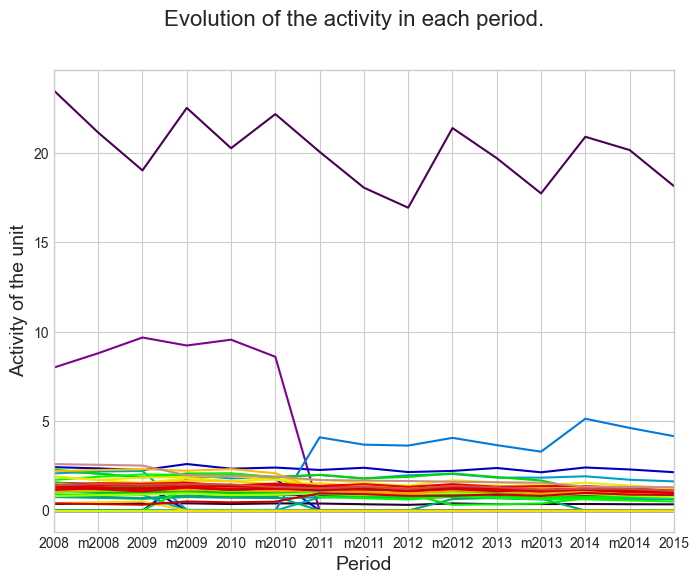

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Evolution of the activity in each period.", size=16)

for i in range(economy.sectors):
    ax.plot(periods[: plan.periods], activity[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel("Activity of the unit", size=14)

plt.savefig(Path("figures", "unit_activity.png"))

### Production

Note that a period with negative production means that more product was used than supplied.

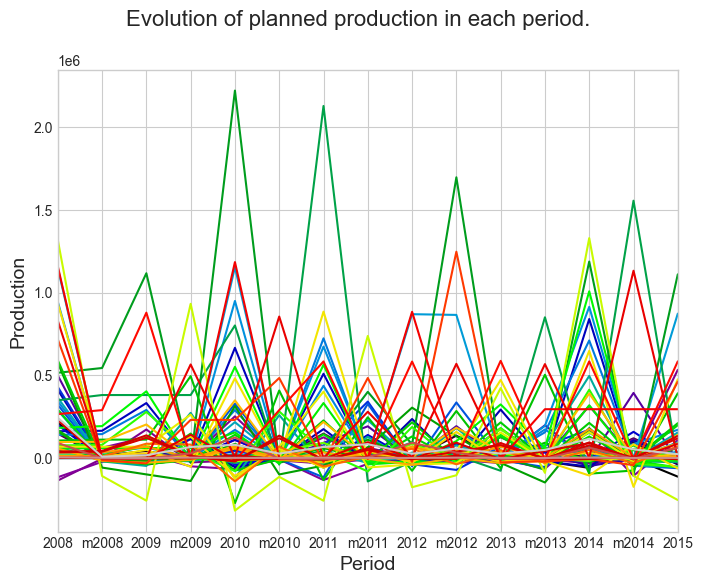

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Evolution of planned production in each period.", size=16)

for i in range(economy.products):
    ax.plot(periods[: plan.periods], planned_economy.production[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel("Production", size=14)

plt.savefig(Path("figures", "planned_prod.png"))

### Excess production

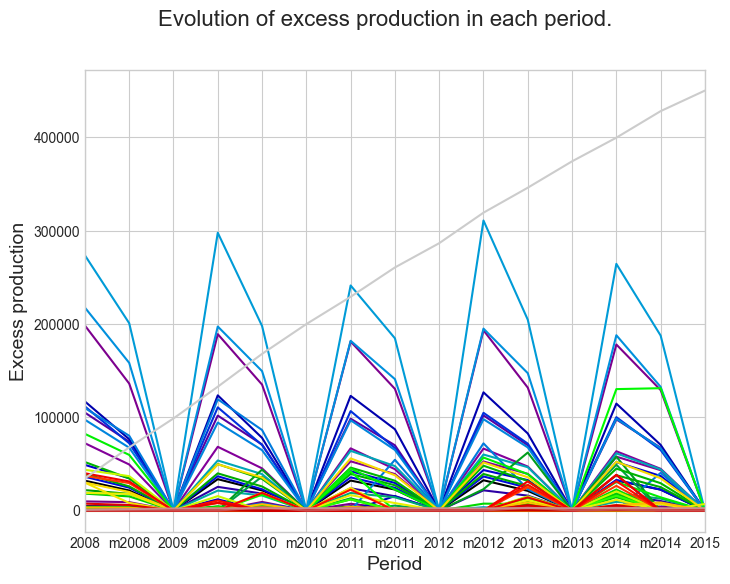

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Evolution of excess production in each period.", size=16)

for i in range(economy.products):
    ax.plot(periods[: plan.periods], surplus[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel("Excess production", size=14)

plt.savefig(Path("figures", "excess_prod.png"))

Note how carbon dioxide keeps rising since it is not used.

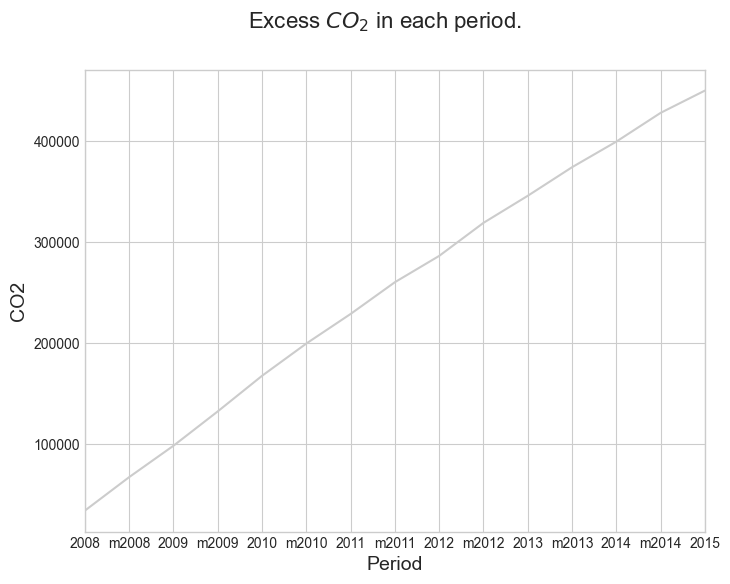

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle(r"Excess $CO_2$ in each period.", size=16)

ax.plot(periods[: plan.periods], surplus[59, :], c=colors[59, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel(economy.product_names[59], size=14)

plt.savefig(Path("figures", "excess_co2.png"))

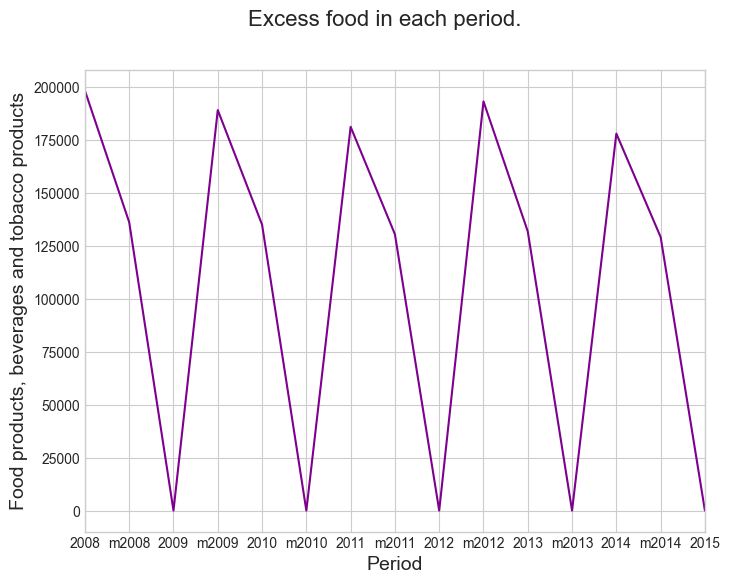

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Excess food in each period.", size=16)

ax.plot(periods[: plan.periods], surplus[4, :], c=colors[4, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel(economy.product_names[4], size=14)

plt.savefig(Path("figures", "excess_food.png"))

### Imported final goods

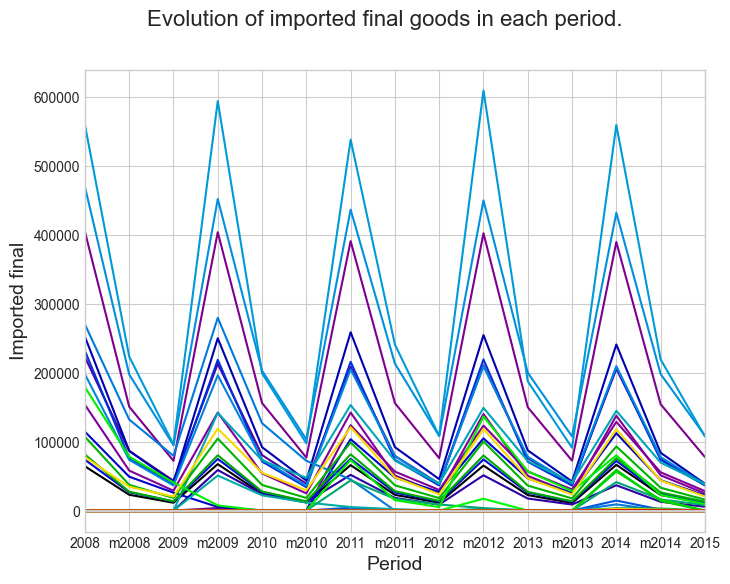

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Evolution of imported final goods in each period.", size=16)

for i in range(economy.products):
    ax.plot(periods[: plan.periods], total_import[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel("Imported final", size=14)

plt.savefig(Path("figures", "planned_prod.png"))

### Export deficit

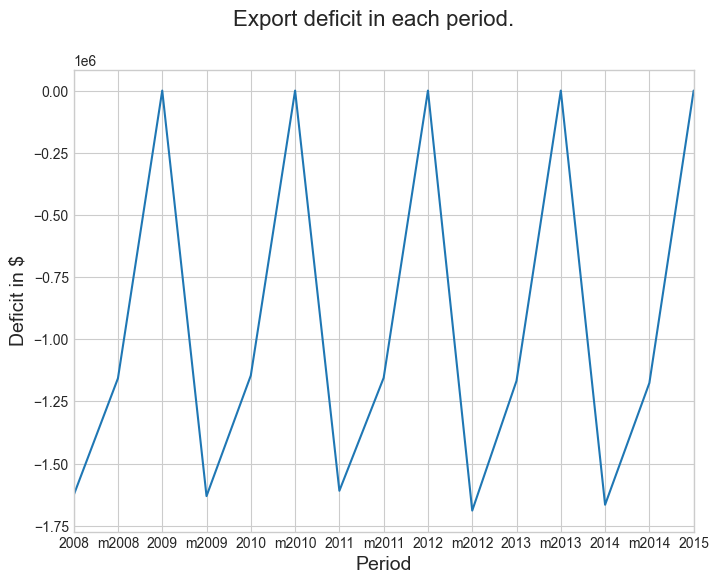

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Export deficit in each period.", size=16)

ax.plot(periods[: plan.periods], export_deficit)

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel("Deficit in $", size=14)

plt.savefig(Path("figures", "export_deficit.png"))

### Total worked hours

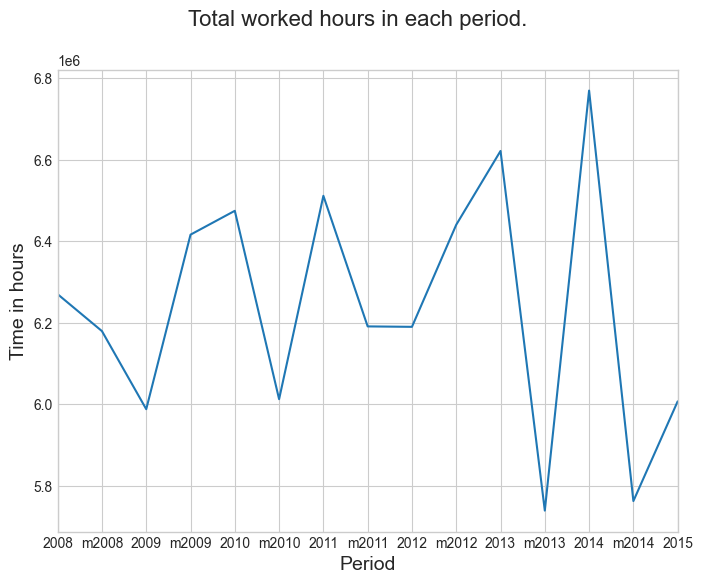

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Total worked hours in each period.", size=16)

ax.plot(periods[: plan.periods], worked_hours)

plan_lims = ax.set_xlim(periods[0], periods[plan.periods - 1])
ax.set_xlabel("Period", size=14)
ax.set_ylabel("Time in hours", size=14)

plt.savefig(Path("figures", "worked_hours.png"))